# Problem 1: Linear Regression

**1.1) Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, data types, shape, EDA). Perform Univariate and Bivariate Analysis.**

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset
data = pd.read_csv('Firm_level_data.csv')

In [121]:
# Show Sample data
data

,firm_id,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46
...,...,...,...,...,...,...,...,...,...,...
754,754,1253.900196,708.299935,32,412.936157,22.100002,yes,0.697454,267.119487,33.50
755,755,171.821025,73.666008,1,0.037735,1.684000,no,NaN,228.475701,46.41
756,756,202.726967,123.926991,13,74.861099,1.460000,no,5.229723,580.430741,42.25
757,757,785.687944,138.780992,6,0.621750,2.900000,yes,1.625398,309.938651,61.39


### Data Dictionary

**The dataset contain information related to various factors of companies. 
Each factor is associated with different variables. Here's a summary of the variables in the data set:

   - firm_id: Unique identifier of a firm and its a running number between 0 and 758
    - sales: Sales of companies measured in millions of dollars.
    - capital: Net stock of property, plant, and equipment.
    - patents: Number of granted patents.
    - randd: Research and Development (R&D) stock measured in millions of dollars.
    - employment: Employment level measured in thousands.
    - sp500: Membership of firms in the S&P 500 index, which represents the stock performance of 500 large companies listed on US stock exchanges.
    - tobinq: Tobin's q ratio, which compares the market value of a physical asset to its replacement value.
    - value: Stock market value.
    - institutions: Proportion of stock owned by institutions.

**These variables can be used to analyze and understand various aspects of companies, such as their financial performance, research and development activities, market value, and ownership structure.**

**Drop Firm_id column**

In [122]:
data.drop("firm_id",inplace=True, axis=1)

In [123]:
# Get the shape of the dataset
data_shape = data.shape
print("Data shape:", data_shape)

Data shape: (759, 9)


In [124]:
# Check for null values
null_values = data.isnull().sum()
print("Null values:\n", null_values)

Null values:
 sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64


**Inference / Insight**
- The dataset has 9 features and 758 obsevations, of which only "tobinq" feature has null values / missing values, the % of missing values is 2.8%, which can be imputed using MEAN IMPUTATION method prior to model building excercise**

In [125]:
# Check data types
data_types = data.dtypes
print("Data types:\n",data_types)

Data types:
 sales           float64
capital         float64
patents           int64
randd           float64
employment      float64
sp500            object
tobinq          float64
value           float64
institutions    float64
dtype: object


**Inference / Insight**
- The dataset contains mix of different data types and it has 7 float, 1 int and 1 object data type

In [126]:
# Summary statistics
data.describe()

,sales,capital,patents,randd,employment,tobinq,value,institutions
count,759.000000,759.000000,759.000000,759.000000,759.000000,738.000000,759.000000,759.000000
mean,2689.705158,1977.747498,25.831357,439.938074,14.164519,2.794910,2732.734750,43.020540
std,8722.060124,6466.704896,97.259577,2007.397588,43.321443,3.366591,7071.072362,21.685586
min,0.138000,0.057000,0.000000,0.000000,0.006000,0.119001,1.971053,0.000000
25%,122.920000,52.650501,1.000000,4.628262,0.927500,1.018783,103.593946,25.395000
50%,448.577082,202.179023,3.000000,36.864136,2.924000,1.680303,410.793529,44.110000
75%,1822.547366,1075.790020,11.500000,143.253403,10.050001,3.139309,2054.160386,60.510000
max,135696.788200,93625.200560,1220.000000,30425.255860,710.799925,20.000000,95191.591160,90.150000


**Inference / Insight**
- The average sales is 2689 and median sales values is 448, it shows that there are outlairs in this feature and it has to be imputed prior to model building excercise
- Similerly we could see outlairs in capital, patents, randd, employment and value features which need outleir treatment and we can consider IQR (Inter quartile range) method for imputing these features


### # Univariate Analysis

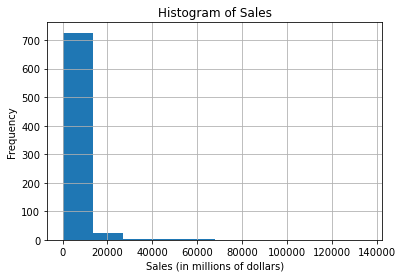

In [127]:
# Univariate Analysis
data['sales'].hist()
plt.xlabel('Sales (in millions of dollars)')
plt.ylabel('Frequency')
plt.title('Histogram of Sales')
plt.show()

**Based on the given range of values for the 'sales' feature (ranging from 0.13 to 135,696.7882), here are some inferences we can make:**

- 1. Sales Variation: The sales data exhibits a wide variation, spanning several orders of magnitude. This indicates that the dataset includes companies with varying levels of sales, from relatively low values (0.13) to very high values (135,696.7882).

- 2. Diverse Company Sizes: The range suggests the presence of both smaller companies with lower sales figures and larger companies with significantly higher sales. This indicates that the dataset covers a diverse range of company sizes.

- 3. Outliers: Since the maximum value is significantly higher than the majority of the data, it is likely that there are a few extreme outliers in the dataset. These outliers may represent companies with exceptional sales performance.

- 4. Skewness: The distribution of the 'sales' feature might be right-skewed. This is because the maximum value is much higher than the mean and median values. It implies that a few companies may have exceptionally high sales, pulling the average towards higher values.

- 5. Potential Influential Factors: Considering the wide range of sales values, it may be interesting to investigate potential factors that contribute to the high sales figures of certain companies. Variables such as capital, research and development (R&D) stock, or stock market value might be worth exploring to understand their relationships with sales.

- 6. Scaling Considerations: Due to the significant difference in the magnitude of sales values, it might be beneficial to apply data scaling techniques (e.g., normalization or standardization) before performing certain analyses or modeling tasks to ensure the fair treatment of different features.

**These inferences provide a preliminary understanding of the 'sales' feature in the dataset. However, further analysis and exploration are recommended to gain deeper insights and draw more specific conclusions based on the context and objectives of  study.**

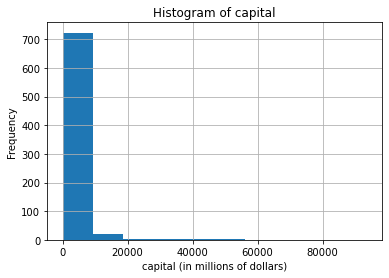

In [128]:
data['capital'].hist()
plt.xlabel('capital (in millions of dollars)')
plt.ylabel('Frequency')
plt.title('Histogram of capital')
plt.show()

Based on the given range of values for the 'capital' feature (ranging from 0.57 to 93,625.20056), here are some inferences we can make:

1. Capital Investment: The 'capital' feature represents the net stock of property, plant, and equipment for companies. The range of values suggests that companies in the dataset have made capital investments ranging from relatively low values (0.57) to significantly higher values (93,625.20056).

2. Varying Levels of Asset Ownership: The wide range indicates that companies have different levels of ownership in terms of property, plant, and equipment. Some companies might have minimal capital investments, while others have made substantial investments, indicating a varied asset base.

3. Outliers: Similar to the 'sales' feature, it is likely that there are outliers in the 'capital' feature as well. Outliers may represent companies with exceptionally high net stock of property, plant, and equipment.

4. Skewness: The distribution of the 'capital' feature may also be right-skewed, as the maximum value is significantly higher than the mean and median values. This suggests that a few companies may have made extensive capital investments, causing the average to be pulled towards higher values.

5. Relationship with Sales: There might be a potential relationship between the 'capital' feature and the 'sales' feature. Companies with higher capital investments may have the potential to generate higher sales. Exploring the correlation or relationship between these two variables could provide insights into the capital efficiency and revenue generation of companies.

6. Scaling Considerations: Similar to the 'sales' feature, due to the significant difference in the magnitude of 'capital' values, it might be beneficial to apply data scaling techniques before performing certain analyses or modeling tasks to ensure fair treatment of different features.

These inferences provide a preliminary understanding of the 'capital' feature in the dataset. However, further analysis and exploration are recommended to gain deeper insights and draw more specific conclusions.

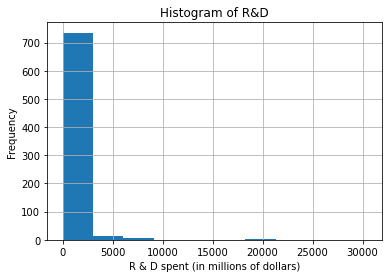

In [129]:
data['randd'].hist()
plt.xlabel('R & D spent (in millions of dollars)')
plt.ylabel('Frequency')
plt.title('Histogram of R&D')
plt.show()

Based on the provided mean and median values for the 'randd' feature (mean = 439.938074, median = 36.864136), here are some business inferences we can make:

1. Skewed Distribution: The 'randd' feature exhibits a right-skewed distribution as the mean (439.938074) is significantly higher than the median (36.864136). This indicates that there are a few companies with exceptionally high R&D stocks, pulling the average towards higher values.

2. R&D Investment: The 'randd' feature represents the R&D stock of companies. The higher mean value suggests that, on average, companies in the dataset have relatively substantial investments in research and development. This indicates a focus on innovation and technological advancements within these companies.

3. Variation in R&D Investments: The wide gap between the mean and median values suggests significant variation in R&D investments across companies. While the median value represents the typical or median level of R&D investment, the presence of high-value outliers indicates the existence of companies with extensive R&D budgets.

4. Importance of Innovation: The higher mean value implies that R&D is considered an essential aspect of business strategy within the dataset. Companies with higher R&D investments may be more focused on innovation and developing new products, technologies, or services.

5. Competitive Advantage: Companies with higher R&D stocks may have a competitive advantage over their competitors in terms of technological advancements and product development. This can contribute to their market position and potential for growth.

6. Potential Business Opportunities: Identifying companies with exceptionally high R&D stocks can provide opportunities for collaboration, partnerships, or investment in innovative and research-driven enterprises.

7. Comparing R&D with Other Variables: To gain deeper insights, it would be beneficial to analyze the relationship between R&D (randd) and other variables such as sales, employment, or patents. This analysis can help identify any correlation or causation between R&D investments and various business outcomes.

These inferences provide a preliminary understanding of the 'randd' feature in the dataset. However, further analysis and exploration are recommended to gain deeper insights and draw more specific conclusions.

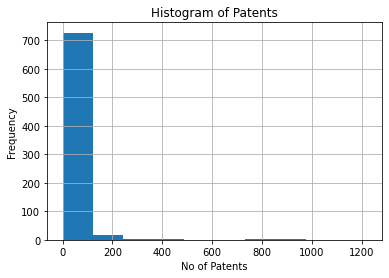

In [130]:
data['patents'].hist()
plt.xlabel('No of Patents')
plt.ylabel('Frequency')
plt.title('Histogram of Patents')
plt.show()

Based on the provided range and standard deviation of the 'patents' feature (ranging from 0 to 1220, standard deviation = 97.25), here are some business inferences we can derive:

1. Variation in Patent Activity: The 'patents' feature indicates the number of granted patents for companies. The range of values suggests that companies in the dataset have varying levels of patent activity, ranging from no granted patents (0) to a maximum of 1220 granted patents.

2. Innovation and Intellectual Property: The presence of granted patents indicates that companies in the dataset invest in innovation and intellectual property protection. Companies with higher numbers of patents may have a stronger focus on research and development, leading to new inventions or technological advancements.

3. Patent Portfolio Diversity: The standard deviation (97.25) signifies the level of dispersion or diversity in the number of patents across companies. A higher standard deviation indicates that there is considerable variation in patent activity among the companies. Some companies may have a more extensive patent portfolio compared to others.

4. Competitive Advantage: Companies with a larger number of granted patents may possess a competitive advantage over their competitors. A strong patent portfolio can protect their innovations and provide them with exclusivity in the market, potentially leading to market dominance or higher market value.

5. Technological Leadership: Companies with a higher number of patents may be perceived as leaders in their respective industries or technological domains. This can enhance their reputation and attract strategic partnerships or investments.

6. Intellectual Property Strategy: Analyzing the patent activity can provide insights into a company's intellectual property strategy. Companies with a higher number of patents may prioritize innovation and intellectual property protection as key elements of their business strategy.

7. Collaboration and Licensing Opportunities: Companies with fewer granted patents may explore collaboration or licensing opportunities with companies having a more extensive patent portfolio. Collaborating with patent-rich companies can provide access to valuable intellectual property and facilitate technology transfer.

8. Patent Trends: Analyzing the distribution of patents over time can reveal trends in innovation and technological advancements within the dataset. It can help identify emerging technologies or areas of focus for the companies.

These inferences provide a preliminary understanding of the 'patents' feature in the dataset. Further analysis, including exploring relationships with other variables or industry-specific considerations, would enable us to draw more specific conclusions based on the context and objectives of the study.

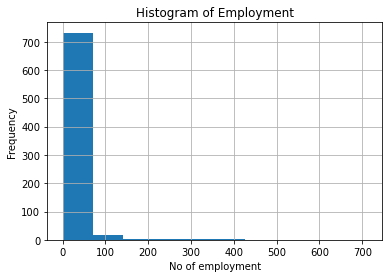

In [131]:
data['employment'].hist()
plt.xlabel('No of employment')
plt.ylabel('Frequency')
plt.title('Histogram of Employment')
plt.show()

Based on the provided mean, median, and standard deviation values for the 'employment' feature (mean = 14.16, median = 2.92, standard deviation = 43.32), here are some insights we can derive:

1. Skewed Distribution: The 'employment' feature exhibits a right-skewed distribution as the mean (14.16) is higher than the median (2.92). This suggests that there are a few companies with relatively high employment levels, pulling the average towards higher values.

2. Varying Workforce Sizes: The wide difference between the mean and median indicates significant variation in employment levels across companies. While the median value represents the typical or median level of employment, the presence of high-value outliers suggests the existence of companies with larger workforces.

3. Diverse Company Sizes: The range of values for the 'employment' feature indicates that the dataset covers a wide range of company sizes in terms of employment. It includes both smaller companies with lower employment figures and larger companies with relatively higher employment levels.

4. Industry Considerations: The interpretation of employment values depends on the specific industry or sector represented in the dataset. Employment levels can vary significantly across industries, such as technology, manufacturing, or services. Understanding the industry context is important for drawing accurate conclusions.

5. Potential Outliers: The standard deviation of 43.32 suggests the presence of significant variability in employment levels. It is likely that there are outliers in the dataset, representing companies with exceptionally high employment numbers. These outliers may be large corporations or companies in labor-intensive industries.

6. Employment Stability: The variation in employment levels across companies may indicate differences in employment stability. Companies with higher employment figures might have more stable workforce sizes, while those with lower figures may experience more fluctuations or rely on a more flexible workforce.

7. Impact on Other Variables: Exploring the relationship between the 'employment' feature and other variables, such as sales or capital, can provide insights into the correlation between employment levels and business performance. It can help identify whether larger workforces are associated with higher sales or greater capital investments.

8. Economic Indicators: The 'employment' feature can be used as an economic indicator to assess the labor market's health or the overall economic activity within the dataset. Changes in employment levels can reflect broader economic trends or fluctuations.

These insights provide a preliminary understanding of the 'employment' feature in the dataset. Further analysis, considering industry-specific factors and exploring relationships with other variables, would allow to draw more specific conclusions based on the context and objectives of your study.

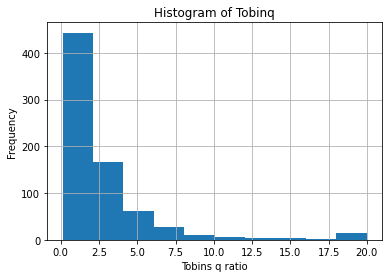

In [132]:
data['tobinq'].hist()
plt.xlabel('Tobin''s q ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Tobinq')
plt.show()

Based on the provided mean, median, and standard deviation values for the 'tobinq' feature (mean = 2.79, median = 1.68, standard deviation = 3.36), here are some insights we can derive:

1. Wide Range of Ratios: The 'tobinq' feature represents Tobin's q ratio, which is the ratio between a physical asset's market value and its replacement value. The range of values suggests significant variation in the Tobin's q ratios across companies in the dataset.

2. Skewed Distribution: The right-skewed distribution can be inferred from the fact that the mean (2.79) is higher than the median (1.68). This suggests that there are companies with higher Tobin's q ratios, pulling the average towards higher values.

3. Asset Valuation: The Tobin's q ratio provides insights into how the market values a company's physical assets relative to their replacement value. A ratio greater than 1 indicates that the market values the assets higher than their replacement cost, potentially indicating positive investor sentiment or expectations of future growth.

4. Potential Overvaluation: Companies with Tobin's q ratios significantly higher than 1 may be considered overvalued by the market. This could indicate that investors have high expectations of future returns or growth potential based on the company's assets.

5. Industry Comparisons: The interpretation of Tobin's q ratios should consider industry-specific characteristics and norms. Different industries may have varying average ratios due to differences in asset types, depreciation rates, or growth prospects. Comparing ratios within the same industry can provide more meaningful insights.

6. Investment Opportunities: Low Tobin's q ratios (below 1) might suggest potential investment opportunities. A ratio below 1 indicates that the market values the assets lower than their replacement cost, which may imply undervaluation or potential for value creation.

7. Impact of Market Conditions: Tobin's q ratios can be influenced by market conditions, such as economic cycles or investor sentiment. During periods of economic growth or favorable market conditions, higher Tobin's q ratios might be observed.

8. Relationship with Company Performance: Exploring the relationship between Tobin's q ratios and other variables, such as sales or profitability, can provide insights into the correlation between asset valuation and business performance. It can help identify whether companies with higher ratios also exhibit stronger financial performance.

Further analysis, considering industry-specific factors and exploring relationships with other variables, would allow us to draw more specific conclusions.

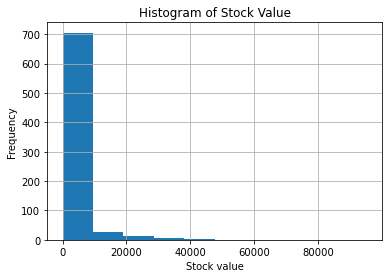

In [133]:
data['value'].hist()
plt.xlabel('Stock value')
plt.ylabel('Frequency')
plt.title('Histogram of Stock Value')
plt.show()

Based on the provided mean, median, and standard deviation values for the 'value' feature (mean = 2732.73, median = 410.79, standard deviation = 7071.07), here are some key business insights we can derive:

1. Wide Range of Stock Market Values: The 'value' feature represents the stock market value of companies. The wide range of values suggests significant variation in market valuations across the companies in the dataset.

2. Skewed Distribution: The right-skewed distribution can be inferred from the fact that the mean (2732.73) is higher than the median (410.79). This indicates that there are companies with higher stock market values, pulling the average towards higher values.

3. Company Valuation: The 'value' feature provides insights into how the market values companies in terms of their market capitalization. Higher values indicate that the market perceives these companies to have a higher worth or market value.

4. Outliers: The presence of outliers is likely due to companies with exceptionally high stock market values. These outliers may represent companies with strong market performance or significant market capitalization.

5. Market Capitalization Considerations: The 'value' feature reflects the market's perception of a company's worth. Higher market capitalization can signify factors such as strong financial performance, growth prospects, brand value, or market dominance.

6. Industry Comparisons: Comparing the market values across companies within the same industry can provide insights into relative market perceptions and competitiveness. Different industries may have different average market values based on factors such as revenue potential, growth rates, or industry dynamics.

7. Impact of Market Conditions: The stock market values can be influenced by market conditions, investor sentiment, and economic factors. During periods of market optimism or favorable economic conditions, higher stock market values may be observed.

8. Relationship with Financial Performance: Exploring the relationship between stock market values and other financial variables, such as sales, profitability, or earnings, can provide insights into the correlation between market value and business performance. It can help identify whether companies with higher market values also exhibit stronger financial performance.

9. Potential Investment Opportunities: Companies with lower market values relative to their intrinsic value may present potential investment opportunities. A lower market value may suggest undervaluation or room for market correction.


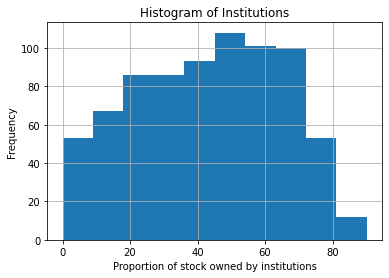

In [134]:
data['institutions'].hist()
plt.xlabel('Proportion of stock owned by institutions')
plt.ylabel('Frequency')
plt.title('Histogram of Institutions')
plt.show()

Based on the provided mean and standard deviation values for the 'institutions' feature (mean = 43.02, standard deviation = 21.68), here are some key insights we can derive:

1. Institutional Ownership: The 'institutions' feature represents the proportion of stock owned by institutions. Institutions can include mutual funds, pension funds, hedge funds, and other institutional investors.

2. Variation in Institutional Ownership: The standard deviation of 21.68 suggests a significant variation in institutional ownership across the companies in the dataset. Some companies may have a higher proportion of institutional ownership, while others may have a lower proportion.

3. Market Influence: Higher institutional ownership indicates that institutional investors have a significant stake in the company's stock. Institutions' investment decisions can impact the company's stock price and overall market sentiment.

4. Investor Confidence: Higher institutional ownership may be seen as a vote of confidence from institutional investors. It suggests that these investors perceive the company to have strong growth potential, profitability, or other favorable characteristics.

5. Market Stability: Institutional ownership can contribute to market stability. Institutional investors typically have longer investment horizons and are less prone to rapid buying or selling decisions, which can help reduce stock price volatility.

6. Impact on Corporate Governance: Companies with higher institutional ownership may be subject to increased scrutiny and oversight from institutional investors. Institutional shareholders often have voting rights and may play a role in shaping corporate governance policies.

7. Influence on Strategic Decisions: Institutional investors, particularly those with a substantial ownership stake, may have influence over the company's strategic decisions. They may engage in discussions with management regarding corporate strategy, capital allocation, or other important matters.

8. Industry Comparisons: Comparing institutional ownership across companies within the same industry can provide insights into industry norms and investor preferences. Different industries may attract varying levels of institutional ownership based on factors such as industry stability, growth potential, or regulatory environment.

9. Potential Investor Interest: Companies with lower institutional ownership may attract the attention of individual investors or retail investors looking for opportunities outside of institutional consensus. This can create potential opportunities for investor diversification or alternative investment strategies.

### Bivariate Analysis

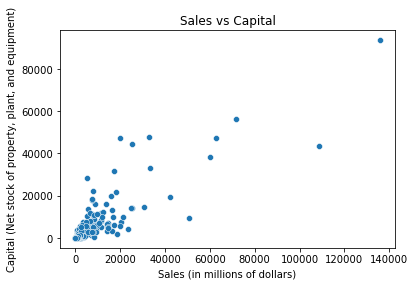

Correlation coefficient between sales and capital: 0.8695945295585586


In [135]:
# Bivariate Analysis: Sales vs Capital
sns.scatterplot(data=data, x='sales', y='capital')
plt.title('Sales vs Capital')
plt.xlabel('Sales (in millions of dollars)')
plt.ylabel('Capital (Net stock of property, plant, and equipment)')
plt.show()

# Calculate the correlation coefficient
correlation = data['sales'].corr(data['capital'])
print(f"Correlation coefficient between sales and capital: {correlation}")

With a correlation coefficient of 0.8696 between 'sales' and 'capital', we can derive the following business insights:

1. Strong Positive Relationship: The high positive correlation coefficient indicates a strong positive relationship between 'sales' and 'capital'. This suggests that as sales increase, there is a tendency for the capital investment in property, plant, and equipment to also increase. 

2. Capital Intensity: The positive correlation implies that companies with higher sales volumes tend to have higher investments in capital assets. This suggests that these companies may have a capital-intensive business model, where they rely on significant physical assets to generate sales and support business operations.

3. Growth and Expansion: The positive relationship between 'sales' and 'capital' indicates that companies with higher sales may be investing in capital assets to support their growth and expansion strategies. Increasing sales may require additional infrastructure, manufacturing facilities, or equipment to meet higher demand.

4. Efficiency and Productivity: The positive correlation suggests that companies may be investing in capital assets to enhance productivity and efficiency in their operations. Higher capital investments could lead to increased automation, improved production processes, or upgraded infrastructure, resulting in higher sales.

5. Industry-specific Considerations: The relationship between 'sales' and 'capital' may vary across industries. Some industries, such as manufacturing or infrastructure, typically require significant capital investments to support sales growth. Comparing the correlation within specific industry sectors can provide industry-specific insights.

6. Capital Planning and Allocation: Understanding the relationship between sales and capital investments can assist in strategic decision-making related to capital planning and allocation. Companies can use this information to align their capital investments with sales forecasts and business growth projections.

7. Financial Performance: Companies with a strong positive correlation between 'sales' and 'capital' may demonstrate a positive relationship between financial performance metrics such as revenue and net income. Higher capital investments may contribute to revenue growth and potentially lead to improved profitability.

8. Risk Management: The correlation between 'sales' and 'capital' should be considered when assessing risk. Over-reliance on capital assets for sales growth may expose companies to risks associated with economic downturns, changes in industry dynamics, or shifts in consumer preferences.

These insights provide an initial understanding of the relationship between 'sales' and 'capital' based on the correlation coefficient. Further analysis, taking into account industry-specific factors, exploring other variables, and considering the business context, would enable us to draw more specific conclusions and make informed business decisions.

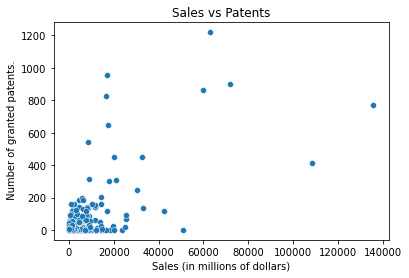

Correlation coefficient between sales and patents: 0.6821344530202256


In [136]:
# Bivariate Analysis: Sales vs patents
sns.scatterplot(data=data, x='sales', y='patents')
plt.title('Sales vs Patents')
plt.xlabel('Sales (in millions of dollars)')
plt.ylabel(' Number of granted patents.')
plt.show()

# Calculate the correlation coefficient
correlation = data['sales'].corr(data['patents'])
print(f"Correlation coefficient between sales and patents: {correlation}")

With a correlation coefficient of 0.6821 between 'sales' and 'patents', we can derive the following business insights:

1. Moderate Positive Relationship: The moderate positive correlation coefficient indicates a positive relationship between 'sales' and 'patents'. This suggests that there is a tendency for higher sales to be associated with a higher number of granted patents.

2. Innovation and Competitive Advantage: The positive correlation suggests that companies with higher sales may be investing in research and development activities, leading to the development of innovative technologies or products that are granted patents. This indicates that innovation plays a role in driving sales growth and may provide companies with a competitive advantage in their respective markets.

3. Intellectual Property Value: The correlation between 'sales' and 'patents' implies that companies with a larger number of granted patents may possess valuable intellectual property assets. These patents can protect innovative products, technologies, or processes, and contribute to a company's market position and revenue generation.

4. Market Differentiation: Companies with a higher number of granted patents may differentiate themselves from competitors by offering unique products or technologies. This differentiation can help attract customers, increase market share, and contribute to sales growth.

5. Long-Term Growth Potential: The positive relationship between 'sales' and 'patents' suggests that companies that invest in research and development, leading to patented innovations, may have greater long-term growth potential. These innovations can drive customer demand, create new revenue streams, and contribute to sustainable business growth.

6. Industry-specific Considerations: The relationship between 'sales' and 'patents' may vary across industries. Some industries, such as technology, pharmaceuticals, or biotechnology, are more research and development-intensive and rely heavily on patents for competitive advantage. Comparing the correlation within specific industry sectors can provide industry-specific insights.

7. Strategic Partnerships and Licensing: Companies with a larger number of patents may have opportunities for strategic partnerships or licensing agreements. These collaborations can generate additional revenue streams through technology transfers, royalties, or joint product development efforts.

8. Brand Value and Reputation: A high number of granted patents can enhance a company's brand value and reputation as an innovative leader in the industry. This can positively influence customer perceptions, attract top talent, and strengthen relationships with partners and investors.

9. Risk of Patent Infringement: Companies with a significant number of granted patents need to be aware of the potential risk of patent infringement by competitors. Protecting and enforcing patents through legal means may be necessary to safeguard the company's innovations and market position.

These insights provide a preliminary understanding of the relationship between 'sales' and 'patents' based on the correlation coefficient. Further analysis, considering industry-specific factors, exploring other variables, and considering the business context, would allow us to draw more specific conclusions and make informed business decisions.

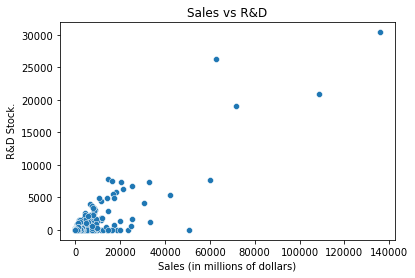

Correlation coefficient between sales and R&d: 0.8701131010124549


In [137]:
# Bivariate Analysis: Sales vs randd
sns.scatterplot(data=data, x='sales', y='randd')
plt.title('Sales vs R&D')
plt.xlabel('Sales (in millions of dollars)')
plt.ylabel(' R&D Stock.')
plt.show()

# Calculate the correlation coefficient
correlation = data['sales'].corr(data['randd'])
print(f"Correlation coefficient between sales and R&d: {correlation}")

With a correlation coefficient of 0.8701 between 'sales' and 'R&D', we can derive the following business insights:

1. Strong Positive Relationship: The high positive correlation coefficient suggests a strong positive relationship between 'sales' and 'R&D'. This indicates that there is a tendency for companies with higher sales to also have higher investments in research and development activities.

2. Innovation and Product Development: The positive correlation implies that companies investing more in R&D may be developing innovative products, technologies, or services. These innovations can contribute to sales growth by meeting customer needs, staying ahead of competitors, and expanding market reach.

3. Competitive Advantage: Higher investments in R&D can lead to the development of unique products or processes, giving companies a competitive advantage. This advantage can result in increased sales as customers perceive the company's offerings as superior or more desirable compared to competitors.

4. Market Differentiation: Companies that allocate resources to R&D may differentiate themselves by introducing novel features, improved functionality, or enhanced performance in their products or services. This differentiation can help attract customers, retain market share, and increase sales.

5. Long-Term Growth Potential: The strong positive correlation indicates that companies with a focus on R&D have greater long-term growth potential. Investing in research and development can lead to the creation of new markets, expansion into new industries, and the development of breakthrough innovations that drive sustained sales growth.

6. Industry-specific Considerations: The relationship between 'sales' and 'R&D' may vary across industries. Industries with a higher emphasis on technological advancements, such as software, biotechnology, or electronics, may exhibit a stronger correlation between sales and R&D. Comparing correlations within specific industry sectors can provide industry-specific insights.

7. Cost of Innovation: While R&D investments can drive sales growth, it is important to consider the cost associated with research and development activities. Companies need to carefully manage and balance their R&D expenditure to ensure a positive return on investment.

8. Market Timing: The correlation suggests that companies with higher sales may have invested strategically in R&D during periods when market demand was favorable or when new opportunities arose. Understanding the timing of R&D investments can help companies align their innovation strategies with market dynamics.

9. Intellectual Property and Patents: The positive correlation indicates that companies with higher R&D investments may generate intellectual property assets, such as patents. These patents can protect their innovations, create barriers to entry for competitors, and contribute to sales growth through licensing or strategic partnerships.

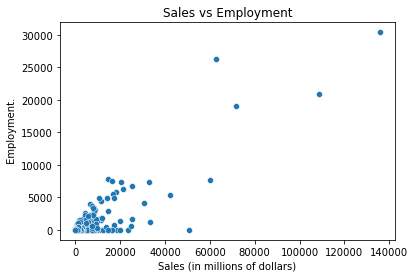

Correlation coefficient between sales and employment: 0.9088681916547849


In [138]:
# Bivariate Analysis: Sales vs employment
sns.scatterplot(data=data, x='sales', y='randd')
plt.title('Sales vs Employment')
plt.xlabel('Sales (in millions of dollars)')
plt.ylabel(' Employment.')
plt.show()

# Calculate the correlation coefficient
correlation = data['sales'].corr(data['employment'])
print(f"Correlation coefficient between sales and employment: {correlation}")

With a correlation coefficient of 0.9089 between 'sales' and 'employment', we can derive the following business insights:

1. Strong Positive Relationship: The high positive correlation coefficient suggests a strong positive relationship between 'sales' and 'employment'. This indicates that as sales increase, there is a tendency for companies to have higher levels of employment.

2. Sales Growth and Workforce Expansion: The positive correlation suggests that companies experiencing sales growth may need to expand their workforce to meet increased demand. Hiring additional employees can help companies handle larger sales volumes, provide better customer service, and support business operations.

3. Labor-Intensive Industries: Industries with a high positive correlation between 'sales' and 'employment' may have labor-intensive operations. These industries rely heavily on human capital and require a larger workforce to generate sales. Examples of labor-intensive industries include retail, hospitality, and healthcare.

4. Job Creation and Economic Impact: The positive relationship between 'sales' and 'employment' implies that sales growth can contribute to job creation and have a positive impact on the economy. Increased employment opportunities can improve income levels, consumer spending, and overall economic activity.

5. Employee Productivity: The correlation suggests that companies with higher sales may need to focus on improving employee productivity to meet increased demand without significantly increasing the workforce. Implementing efficient processes, training programs, and technological advancements can help companies optimize employee productivity and drive sales growth.

6. Sales Forecasting and Workforce Planning: Understanding the correlation between 'sales' and 'employment' can assist in sales forecasting and workforce planning. Companies can use historical sales data to estimate future employment needs, align staffing levels with projected sales volumes, and optimize workforce utilization.

7. Seasonal Variations: It is essential to consider seasonal variations and industry-specific factors that may influence the relationship between 'sales' and 'employment'. Some industries experience fluctuations in sales and, consequently, employment levels based on seasonal demand patterns or cyclical trends.

8. Cost Management: While increased sales may necessitate workforce expansion, companies should carefully manage the associated costs. Balancing labor costs with revenue growth is crucial to maintain profitability and financial sustainability.

9. Employee Engagement and Satisfaction: A strong positive correlation suggests that employees play a significant role in driving sales. Companies should focus on employee engagement, motivation, and satisfaction to ensure they contribute positively to sales growth and overall business success.

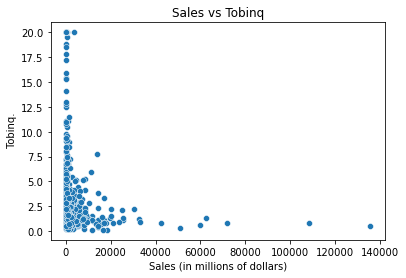

Correlation coefficient between sales and tobinq: -0.11346267727284008


In [139]:
# Bivariate Analysis: Sales vs employment
sns.scatterplot(data=data, x='sales', y='tobinq')
plt.title('Sales vs Tobinq')
plt.xlabel('Sales (in millions of dollars)')
plt.ylabel(' Tobinq.')
plt.show()

# Calculate the correlation coefficient
correlation = data['sales'].corr(data['tobinq'])
print(f"Correlation coefficient between sales and tobinq: {correlation}")

With a correlation coefficient of -0.1135 between 'sales' and 'tobinq', we can derive the following business insights:

1. Weak Negative Relationship: The negative correlation coefficient suggests a weak negative relationship between 'sales' and 'tobinq'. This indicates that there is a slight tendency for companies with higher sales to have a lower Tobin's q ratio.

2. Market Value and Replacement Value: Tobin's q ratio compares the market value of a company to its replacement value. The negative correlation implies that companies with higher sales may have a lower market value relative to their replacement value. This could indicate potential undervaluation by the market or inefficiencies in capturing the value of the company's assets.

3. Market Perception: The negative relationship suggests that the market may have lower expectations regarding the company's future profitability or growth potential, despite higher sales. Investors may perceive the company's market value as relatively low compared to its physical asset value.

4. Investment Efficiency: Companies with higher sales but a lower Tobin's q ratio may face challenges in efficiently allocating their capital or maximizing returns on investment. It could indicate that the company's investments are not generating sufficient market value or that there are inefficiencies in capital allocation.

5. Financial Performance Evaluation: While a weak negative correlation does not provide strong conclusions, it suggests the need for a more comprehensive analysis of the company's financial performance. Evaluating other financial indicators such as profit margins, return on investment, and market perception can provide a more holistic view of the company's performance.

6. Industry-specific Considerations: The relationship between 'sales' and 'tobinq' may vary across industries. Different industries may have varying levels of market value and replacement value dynamics. Comparing the correlation within specific industry sectors can provide industry-specific insights.

7. Capital Structure and Financing: The negative correlation between 'sales' and 'tobinq' may indicate potential issues in the company's capital structure or financing decisions. Companies with high sales but a low market value relative to replacement value may need to evaluate their capital structure, debt levels, or financing strategies.

8. Investor Sentiment: The negative correlation suggests that investors may have concerns about the company's ability to generate future profits or create value from its assets. This could affect investor sentiment and influence investment decisions in the company.

9. Long-term Investment Decisions: The negative correlation indicates that companies with higher sales need to carefully evaluate their long-term investment decisions. Considering factors such as market dynamics, competitive landscape, and capital efficiency can help align investment strategies with expected returns and market expectations.

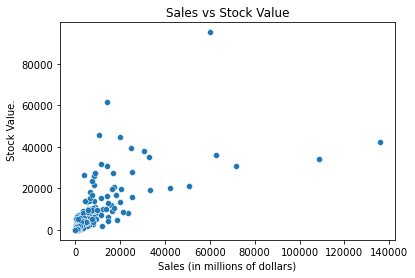

Correlation coefficient between sales and stock value: 0.7137776334470757


In [140]:
# Bivariate Analysis: Sales vs employment
sns.scatterplot(data=data, x='sales', y='value')
plt.title('Sales vs Stock Value')
plt.xlabel('Sales (in millions of dollars)')
plt.ylabel(' Stock Value.')
plt.show()

# Calculate the correlation coefficient
correlation = data['sales'].corr(data['value'])
print(f"Correlation coefficient between sales and stock value: {correlation}")

With a correlation coefficient of 0.7138 between 'sales' and 'stock value', we can derive the following business insights:

1. Strong Positive Relationship: The positive correlation coefficient suggests a strong positive relationship between 'sales' and 'stock value'. This indicates that companies with higher sales tend to have a higher stock market value.

2. Market Confidence: The positive correlation implies that the market has confidence in companies with higher sales, as reflected in their higher stock values. Investors perceive these companies as having better growth prospects, profitability, or market dominance, leading to increased market valuation.

3. Sales as a Value Driver: The strong positive relationship suggests that sales performance is a significant driver of stock market value. Companies that consistently achieve higher sales are more likely to attract investor attention and drive up their stock prices.

4. Investor Sentiment: The positive correlation signifies positive investor sentiment towards companies with higher sales. Investors are more likely to view these companies favorably, leading to increased demand for their stocks and higher valuations.

5. Growth Potential: The correlation suggests that investors see companies with higher sales as having greater growth potential. It indicates that the market values companies that are able to generate revenue and achieve sales growth, signaling confidence in their ability to expand their market share and profitability.

It is important to note that correlation does not imply causation. While there is a strong positive relationship between sales and stock value, other factors such as industry dynamics, competitive landscape, financial performance, and market conditions also play a role in determining stock prices. Therefore, it is essential to conduct further analysis and consider these factors in order to gain a comprehensive understanding of the relationship between sales and stock value and make informed business decisions.

In [141]:
data.columns

Index(['sales', 'capital', 'patents', 'randd', 'employment', 'sp500', 'tobinq',
       'value', 'institutions'],
      dtype='object')

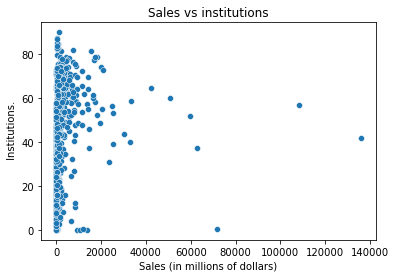

Correlation coefficient between sales and institutions: 0.11648323310848391


In [142]:
# Bivariate Analysis: Sales vs employment
sns.scatterplot(data=data, x='sales', y='institutions')
plt.title('Sales vs institutions')
plt.xlabel('Sales (in millions of dollars)')
plt.ylabel(' Institutions.')
plt.show()

# Calculate the correlation coefficient
correlation = data['sales'].corr(data['institutions'])
print(f"Correlation coefficient between sales and institutions: {correlation}")

With a correlation coefficient of 0.1165 between 'sales' and 'institutions', we can derive the following business insights:

1. Weak Positive Relationship: The positive correlation coefficient suggests a weak positive relationship between 'sales' and 'institutions'. This indicates that there is a slight tendency for companies with higher sales to have a slightly higher proportion of stock ownership by institutional investors.

2. Institutional Investor Interest: The positive correlation implies that institutional investors, such as mutual funds, pension funds, or investment firms, may show interest in companies with higher sales. They may perceive these companies as having better growth prospects, profitability, or stability, leading to increased institutional ownership.

3. Market Validation: The positive relationship suggests that higher sales may attract institutional investors, providing a form of market validation for the company's performance. Institutional investors typically conduct extensive research and analysis before making investment decisions, so their increased ownership can signal confidence in the company's prospects.

4. Investor Influence: As institutional investors typically hold significant ownership stakes in companies, their presence can impact decision-making processes, corporate governance, and strategic direction. Companies with higher sales and a higher proportion of institutional ownership may experience increased shareholder activism or engagement with institutional investors regarding business strategies.

5. Access to Capital: Companies with higher sales and a greater proportion of institutional ownership may have improved access to capital. Institutional investors often have larger pools of capital and can provide additional funding or support for growth initiatives, acquisitions, or capital expenditure projects.

It is important to note that the correlation coefficient of 0.1165 indicates a weak positive relationship, and other factors beyond institutional ownership may also influence sales performance. Additionally, the specific characteristics and behavior of institutional investors can vary, so further analysis is required to understand the nature and implications of the relationship between sales and institutional ownership in the context of the specific dataset and business scenario.

### Impute Null Values** using median imputation method since we outleirs in the dataset

In [143]:
# Calculate the median of the 'tobinq' column
median_value = data['tobinq'].median()

# Impute missing values with the median value
data['tobinq'] = data['tobinq'].fillna(median_value)

In [144]:
data.describe()

,sales,capital,patents,randd,employment,tobinq,value,institutions
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,2689.705158,1977.747498,25.831357,439.938074,14.164519,2.764071,2732.734750,43.020540
std,8722.060124,6466.704896,97.259577,2007.397588,43.321443,3.324665,7071.072362,21.685586
min,0.138000,0.057000,0.000000,0.000000,0.006000,0.119001,1.971053,0.000000
25%,122.920000,52.650501,1.000000,4.628262,0.927500,1.036000,103.593946,25.395000
50%,448.577082,202.179023,3.000000,36.864136,2.924000,1.680303,410.793529,44.110000
75%,1822.547366,1075.790020,11.500000,143.253403,10.050001,3.082979,2054.160386,60.510000
max,135696.788200,93625.200560,1220.000000,30425.255860,710.799925,20.000000,95191.591160,90.150000


**Is scaling important in this analysis**
- By observing the above table, we could see that features are in different scales, it is recommended to perform scaling on the dataset. Common scaling techniques include standardization (subtracting the mean and dividing by the standard deviation) or normalization (scaling the values to a specific range, such as [0, 1]).

**Encode the data (having string values) for Modelling**

In [145]:
from sklearn.preprocessing import OneHotEncoder
feature_to_encode = ['sp500']

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder on the selected feature and transform the data
encoded_data = encoder.fit_transform(data[feature_to_encode]).toarray()

# Create a new DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names(feature_to_encode))

# Concatenate the original DataFrame with the encoded DataFrame
data = pd.concat([data, encoded_df], axis=1)

# Drop the original feature if needed
data.drop(feature_to_encode, axis=1, inplace=True)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**Scaling features using Min Max Scalar method, excluding the target feature sales**

In [146]:
from sklearn.preprocessing import MinMaxScaler

features_to_scale = ['capital', 'patents', 'randd', 'employment', 'tobinq', 'value', 'institutions']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Make a copy of original dataset before scaling
data_scaled=data.copy()

# Fit the scaler on the selected features and transform the data
data_scaled[features_to_scale] = scaler.fit_transform(data[features_to_scale])


In [147]:
data_scaled

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500_no,sp500_yes
0,826.995050,0.001725,0.008197,0.012558,0.003236,0.549797,0.017055,0.890405,1.0,0.0
1,407.753973,0.001304,0.001639,0.000000,0.002608,0.036476,0.002533,0.654687,1.0,0.0
2,8407.845588,0.066447,0.113115,0.108354,0.069856,0.255835,0.271703,0.529118,0.0,1.0
3,451.000010,0.002850,0.000820,0.002746,0.004312,0.009367,0.000641,0.298170,1.0,0.0
4,174.927981,0.001496,0.001639,0.000468,0.002731,0.047498,0.000687,0.548641,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
754,1253.900196,0.007565,0.026230,0.013572,0.031084,0.029096,0.002785,0.371603,0.0,1.0
755,171.821025,0.000786,0.000820,0.000001,0.002361,0.078532,0.002380,0.514809,1.0,0.0
756,202.726967,0.001323,0.010656,0.002460,0.002046,0.257066,0.006077,0.468663,1.0,0.0
757,785.687944,0.001482,0.004918,0.000020,0.004072,0.075771,0.003235,0.680976,0.0,1.0


### Train , Test Split 70:30 ratio and 'sales' as target varibable

In [149]:
from sklearn.model_selection import train_test_split

features = ['capital', 'patents', 'randd', 'employment', 'sp500_yes', 'sp500_no', 'tobinq', 'value', 'institutions']

# Split the data into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(data[features], data['sales'], test_size=0.3, random_state=123)


**Check the shape of train and test split datasets**

In [152]:
train_data.shape, test_data.shape

((531, 9), (228, 9))

### Linear regression model

In [153]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(train_data, train_target)

# Predict the target variable for the test data
predictions = model.predict(test_data)

### Performance Metrics

In [155]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared for train and test sets
train_r2 = r2_score(train_target, model.predict(train_data))
test_r2 = r2_score(test_target, predictions)

# Calculate RMSE for train and test sets
train_rmse = mean_squared_error(train_target, model.predict(train_data), squared=False)
test_rmse = mean_squared_error(test_target, predictions, squared=False)

# Print the results
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train R-squared: 0.9476401687658986
Test R-squared: 0.7875381564132634
Train RMSE: 2160.0405746364313
Test RMSE: 3102.9851835145473


### Inference

Based on the provided R-squared and RMSE values for the linear regression model on the train and test sets, we can draw the following business inferences:

1. Train R-squared: 0.9476401687658986
   Test R-squared: 0.7875381564132634
   - The train R-squared value of approximately 0.948 indicates that the linear regression model can explain about 94.8% of the variance in the target variable (sales) using the training data. This suggests a strong relationship between the features and the target variable in the training set.
   - The test R-squared value of approximately 0.788 indicates that the linear regression model can explain about 78.8% of the variance in the target variable using the test data. This suggests a reasonably good fit of the model to the test data, but it may not perform as well as on the training data.

2. Train RMSE: 2160.0405746364313
   Test RMSE: 3102.9851835145473
   - The train RMSE value of 2160.04 indicates that, on average, the predictions of the linear regression model have an error of approximately 2160 units of the sales variable when compared to the actual values in the training set.
   - The test RMSE value of 3102.99 indicates that, on average, the predictions of the linear regression model have an error of approximately 3103 units of the sales variable when compared to the actual values in the test set.
   - The lower the RMSE, the better the model's predictive performance. In this case, the test RMSE is higher than the train RMSE, suggesting that the model may be slightly overfitting to the training data and not generalizing as well to the test data.

Overall, the business inferences from these performance metrics suggest that the linear regression model has a good fit to the training data, explaining a significant portion of the variance in the sales variable. However, the model's performance on the test data is slightly lower, indicating the possibility of some degree of overfitting. It is important to further evaluate and fine-tune the model to improve its generalization and predictive performance on unseen data.